## Compare LSTM and DCRNN 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import check_array


plt.style.use('fivethirtyeight')

## Load DCRNN predictions

In [2]:
dcrnn_pred1 = pd.read_csv('../data/forecasting/users/_1.csv')
dcrnn_pred3 = pd.read_csv('../data/forecasting/users/_3.csv')
dcrnn_pred6 = pd.read_csv('../data/forecasting/users/_6.csv')
dcrnn_pred12 = pd.read_csv('../data/forecasting/users/_12.csv')

## Load LSTM Prediction

In [3]:
lstm_pred1 = pd.read_csv('../data/forecasting/users/lstm_prediction_1.csv')
lstm_pred3 = pd.read_csv('../data/forecasting/users/lstm_prediction_3.csv')
lstm_pred6 = pd.read_csv('../data/forecasting/users/lstm_prediction_6.csv')
lstm_pred12 = pd.read_csv('../data/forecasting/users/lstm_prediction_12.csv')

lstm_pred1['time_hour'] = pd.to_datetime(lstm_pred1['time_hour'])
lstm_pred3['time_hour'] = pd.to_datetime(lstm_pred3['time_hour'])
lstm_pred6['time_hour'] = pd.to_datetime(lstm_pred6['time_hour'])
lstm_pred12['time_hour'] = pd.to_datetime(lstm_pred12['time_hour'])

## Load DCRNN Y Test

In [4]:
y_test = pd.read_csv('../data/forecasting/users/users_test.csv')
dataset_file = "../data/users.h5"
users_df = pd.read_hdf(dataset_file)
users_df = pd.DataFrame(users_df.to_records())
users_df = users_df

train_data_len = users_df.shape[0] - y_test.shape[0]

## Include time hour column to all predictions

In [5]:
time_hour = users_df[-y_test.shape[0]:]['time_hour'].values

dcrnn_pred1['time_hour'] = time_hour
dcrnn_pred3['time_hour'] = time_hour
dcrnn_pred6['time_hour'] = time_hour
dcrnn_pred12['time_hour'] = time_hour

y_test = y_test.to_numpy()

In [6]:
print(dcrnn_pred1.shape)
print(dcrnn_pred3.shape)
print(dcrnn_pred6.shape)
print(dcrnn_pred12.shape)
print(lstm_pred1.shape)
print(lstm_pred3.shape)
print(lstm_pred6.shape)
print(lstm_pred12.shape)

(38, 401)
(38, 401)
(38, 401)
(38, 401)
(38, 401)
(38, 401)
(38, 401)
(38, 401)


In [7]:
def evaluate_model(YPred, YTest):

    rmse = np.sqrt(np.mean(YPred - YTest)**2)
    YTest = check_array(YTest)
    YPred = check_array(YPred)
    mask = np.not_equal(YTest, 0).astype('float32')
    mask /= np.mean(mask)
    mape = np.abs(np.divide(np.subtract(YPred, YTest).astype('float32'), YTest))
    mape = np.nan_to_num(mask * mape)
    
    return rmse, np.mean(mape)

In [8]:
def plot_bs(bs):
    plt.figure(figsize=(20, 15))
    users_df.plot(x='time_hour', y=bs)

def plot_model(prediction, bs):
    plt.figure(figsize=(20, 15))
    plt.title('Model')
    ax = plt.gca()
    users_df[:train_data_len].plot(x='time_hour', y=bs, ax=ax)
    users_df[train_data_len:].plot(x='time_hour', y=bs, ax=ax)
    prediction.plot(x='time_hour', y=bs, ax=ax)
    plt.legend()

def plot_prediction(prediction, bs):
    plt.figure(figsize=(20, 15))
    plt.title('Model')
    ax = plt.gca()
    users_df[train_data_len:].plot(x='time_hour', y=bs, ax=ax)
    prediction.plot(x='time_hour', y=bs, ax=ax)
    plt.legend()

def plot_compare_models(lstm, dcrnn, bs):
    plt.figure(figsize=(20, 15))
    plt.title(f'Model - bs: {bs}')
    ax = plt.gca()
    users_df[:train_data_len].plot(x='time_hour', y=bs, ax=ax, label='Train')
    users_df[train_data_len:].plot(x='time_hour', y=bs, ax=ax, label='Original', color='blue', linestyle='dashed')
    lstm.plot(x='time_hour', y=bs, ax=ax, label='LSTM', color='red',)
    dcrnn.plot(x='time_hour', y=bs, ax=ax, label='DCRNN', color='orange',)
    plt.legend()
    
def plot_compare_predictions(lstm, dcrnn, bs):
    plt.figure(figsize=(20, 15))
    plt.title(f'Model - bs: {bs}')
    ax = plt.gca()
    users_df[train_data_len:].plot(x='time_hour', y=bs, ax=ax, label='Original', color='blue', linestyle='dashed')
    lstm.plot(x='time_hour', y=bs, ax=ax, label='LSTM', color='red',)
    dcrnn.plot(x='time_hour', y=bs, ax=ax, label='DCRNN', color='orange',)
    plt.legend()

In [9]:
rmse1, mape1 = evaluate_model(dcrnn_pred1[dcrnn_pred1.columns[:-1]].to_numpy(), y_test)
rmse3, mape3 = evaluate_model(dcrnn_pred3[dcrnn_pred3.columns[:-1]].to_numpy(), y_test)
rmse6, mape6 = evaluate_model(dcrnn_pred6[dcrnn_pred6.columns[:-1]].to_numpy(), y_test)
rmse12, mape12 = evaluate_model(dcrnn_pred12[dcrnn_pred12.columns[:-1]].to_numpy(), y_test)
rmse_lstm1, mape_lstm1 = evaluate_model(lstm_pred1[lstm_pred1.columns[:-1]].to_numpy(), y_test)
rmse_lstm3, mape_lstm3 = evaluate_model(lstm_pred3[lstm_pred3.columns[:-1]].to_numpy(), y_test)
rmse_lstm6, mape_lstm6 = evaluate_model(lstm_pred6[lstm_pred6.columns[:-1]].to_numpy(), y_test)
rmse_lstm12, mape_lstm12 = evaluate_model(lstm_pred12[lstm_pred12.columns[:-1]].to_numpy(), y_test)

/home/lucas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/home/lucas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/lucas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/home/lucas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/lucas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/home/lucas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/lucas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/ho

In [10]:
print("RMSE prediction 1:                              ", rmse1)
print("RMSE prediction 3:                              ", rmse3)
print("RMSE prediction 6:                              ", rmse6)
print("RMSE prediction 12:                             ", rmse12)
print("RMSE prediction lstm 1:                           ", rmse_lstm1)
print("RMSE prediction lstm 3:                           ", rmse_lstm3)
print("RMSE prediction lstm 6:                           ", rmse_lstm6)
print("RMSE prediction lstm 12:                           ", rmse_lstm12)

print("")
print("MAPE prediction 1:                              ", mape1)
print("MAPE prediction 3:                              ", mape3)
print("MAPE prediction 6:                              ", mape6)
print("MAPE prediction 12:                             ", mape12)
print("MAPE prediction lstm 1:                           ", mape_lstm1)
print("MAPE prediction lstm 3:                           ", mape_lstm3)
print("MAPE prediction lstm 6:                           ", mape_lstm6)
print("MAPE prediction lstm 12:                           ", mape_lstm12)

RMSE prediction 1:                               98.73734301504385
RMSE prediction 3:                               1595.580057524292
RMSE prediction 6:                               1839.766832761518
RMSE prediction 12:                              6703.75899974054
RMSE prediction lstm 1:                            16.95772577638098
RMSE prediction lstm 3:                            2.287123553241969
RMSE prediction lstm 6:                            11.805964236189471
RMSE prediction lstm 12:                            0.7647387221728059

MAPE prediction 1:                               1.7383989195063398
MAPE prediction 3:                               9.265212354696411
MAPE prediction 6:                               12.800679441276401
MAPE prediction 12:                              45.87646964651137
MAPE prediction lstm 1:                            1.1495249678851593
MAPE prediction lstm 3:                            0.9666175472582056
MAPE prediction lstm 6:                    

<Figure size 1440x1080 with 0 Axes>

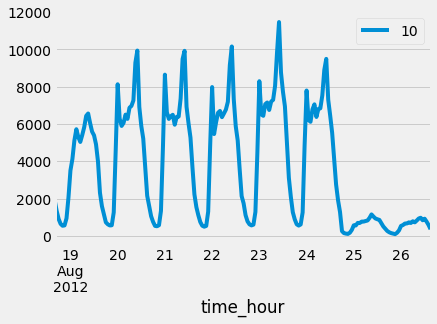

In [11]:
bs = '10'
plot_bs(bs)
bs = int(bs) + 10
bs = str(bs)

## Compare DCRNN with original data

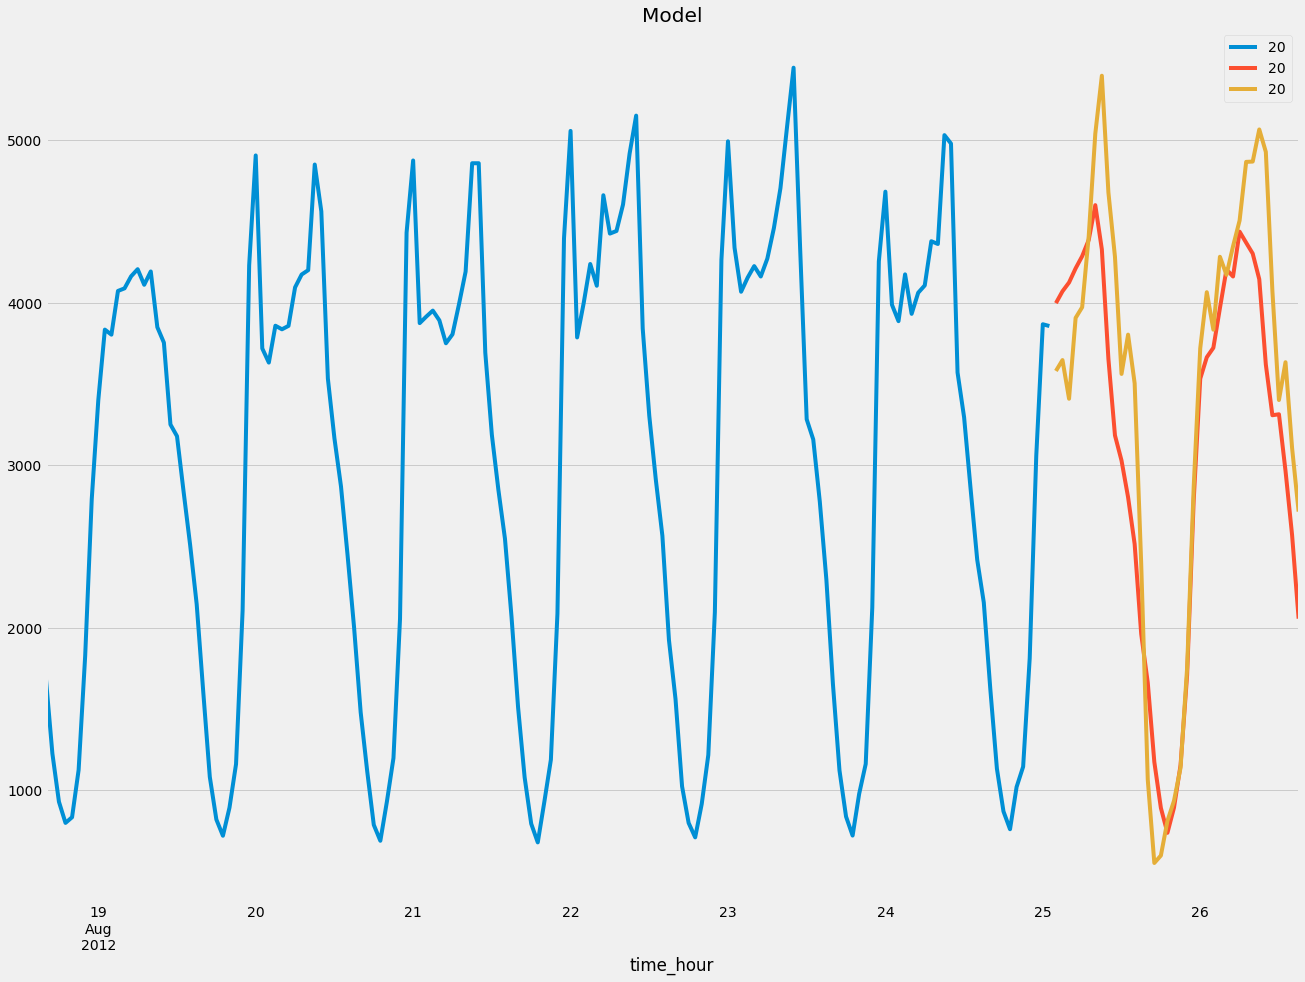

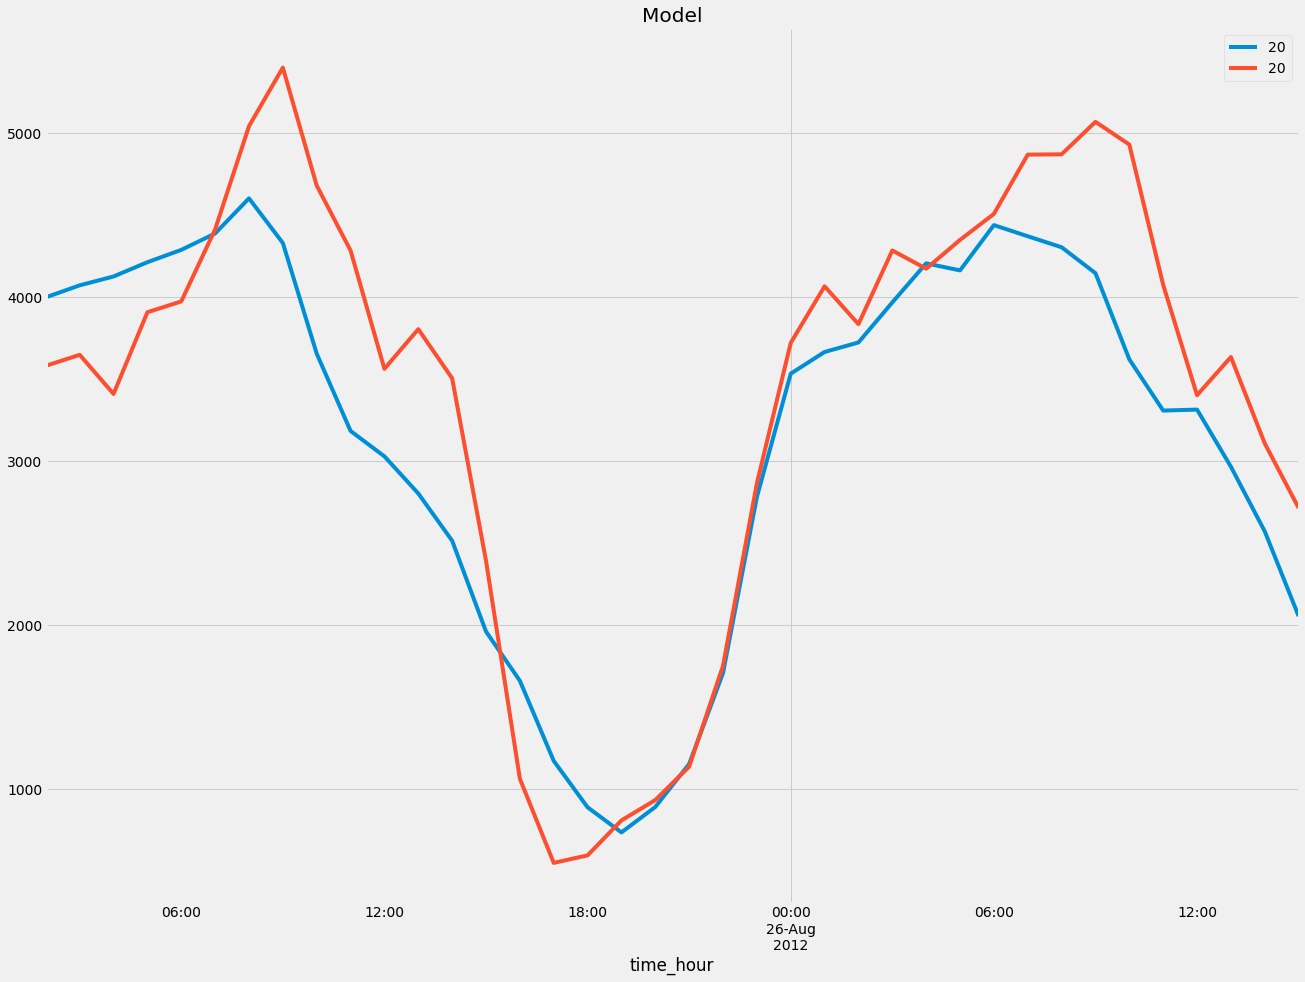

In [12]:
plot_model(dcrnn_pred1, bs)
plot_prediction(dcrnn_pred1, bs)

## Compare LSTM with original data

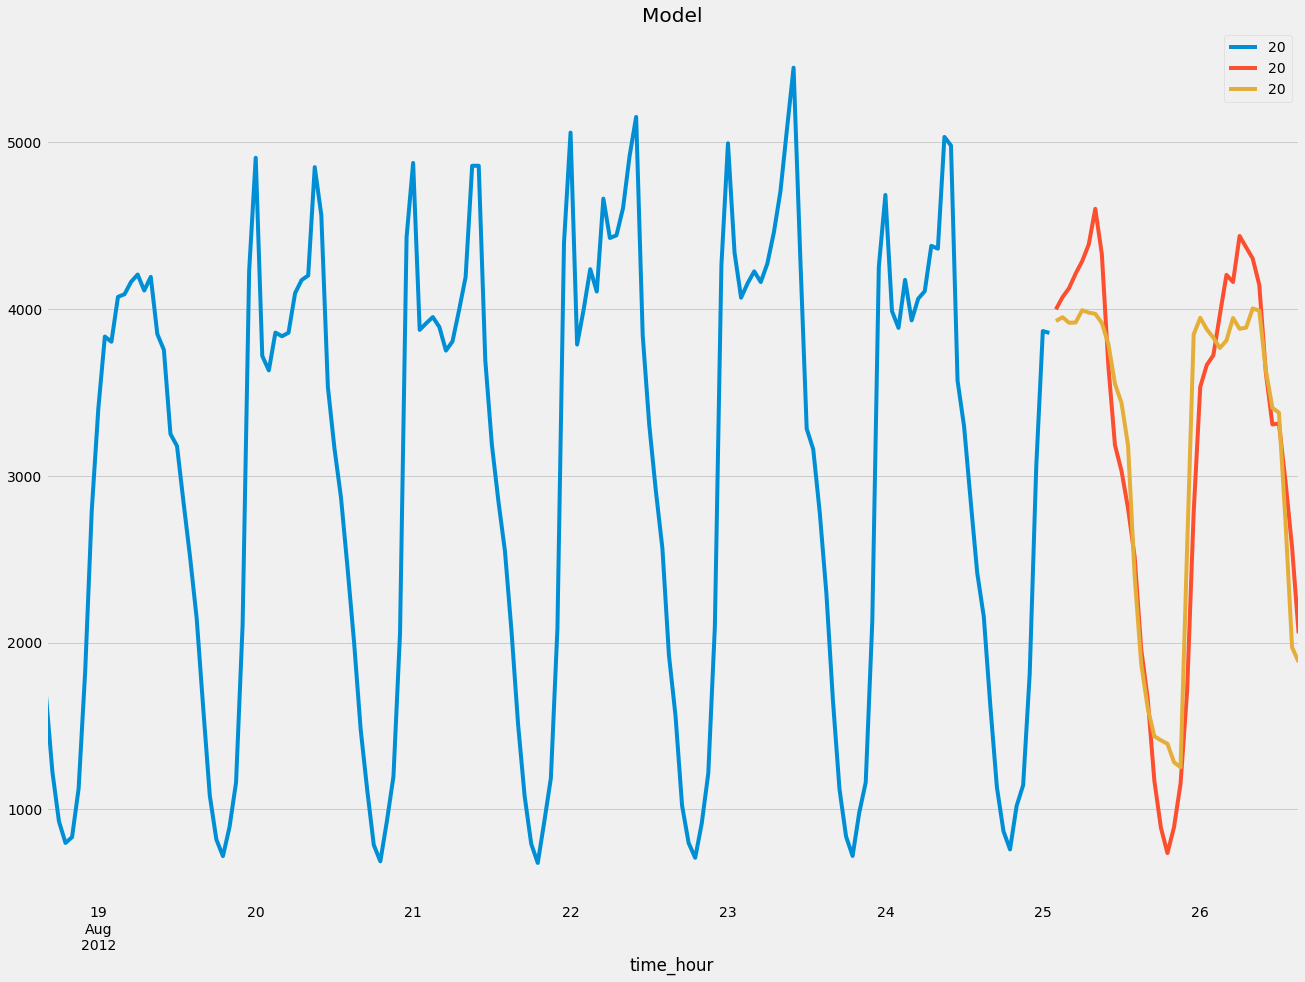

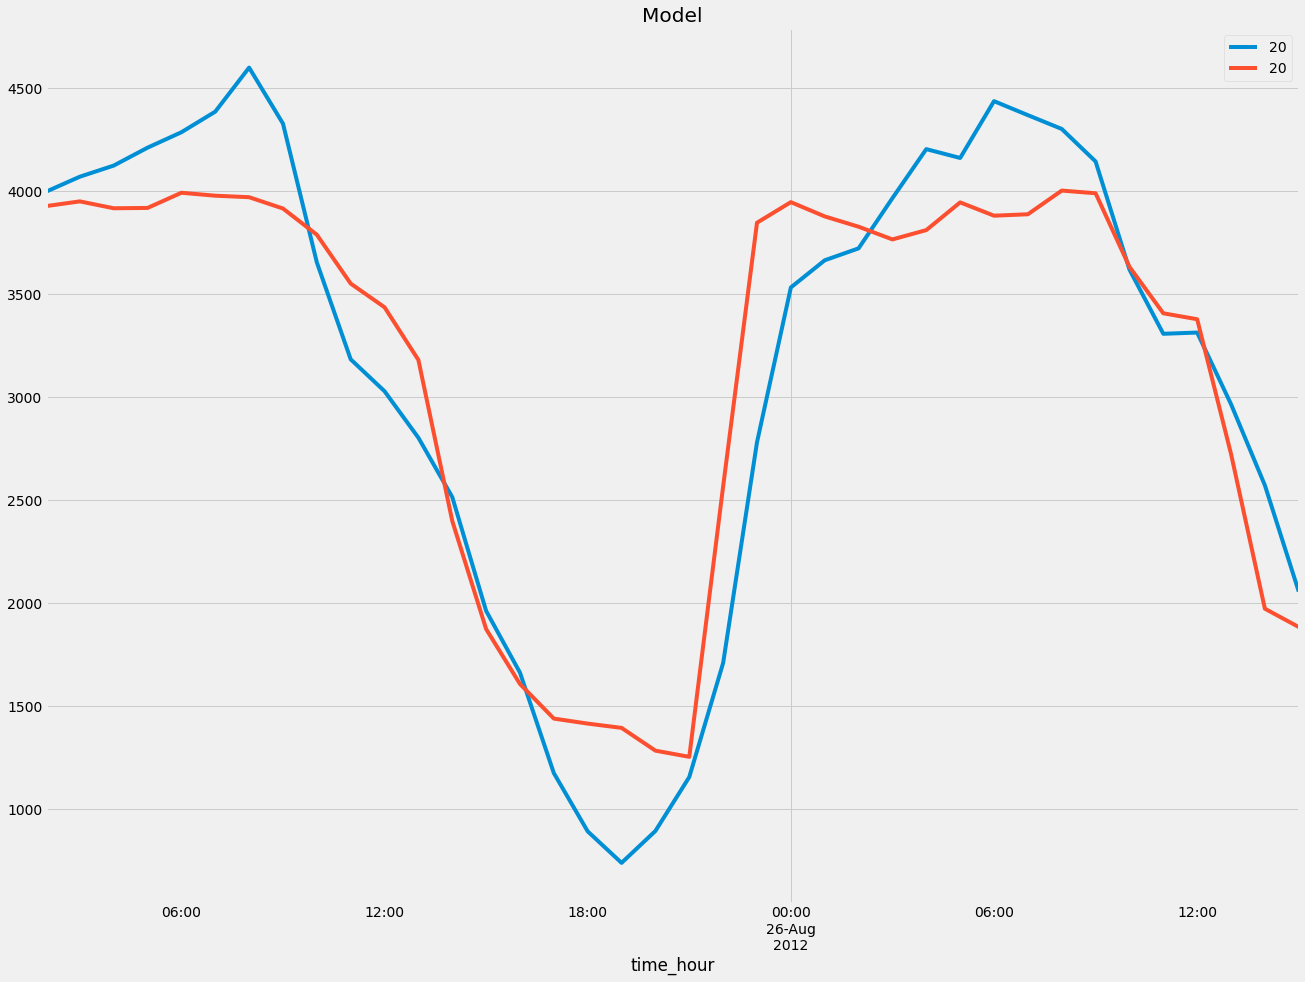

In [13]:
plot_model(lstm_pred1, bs)
plot_prediction(lstm_pred1, bs)

## Compare LSTM and DCRNN

### Bad BS

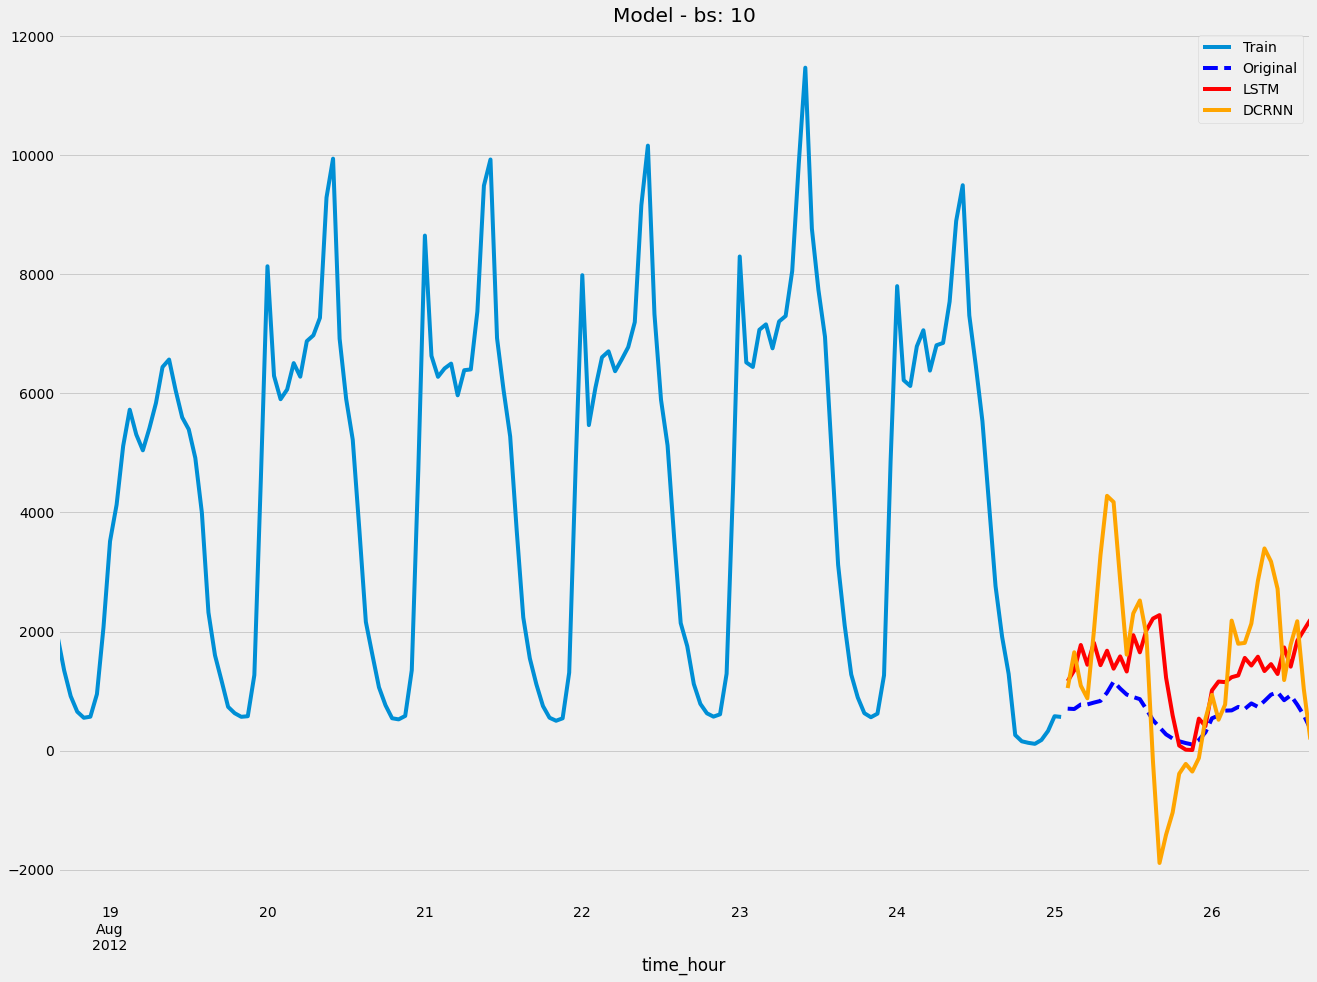

In [14]:
bs = "10"
plot_compare_models(lstm_pred12, dcrnn_pred1, bs)

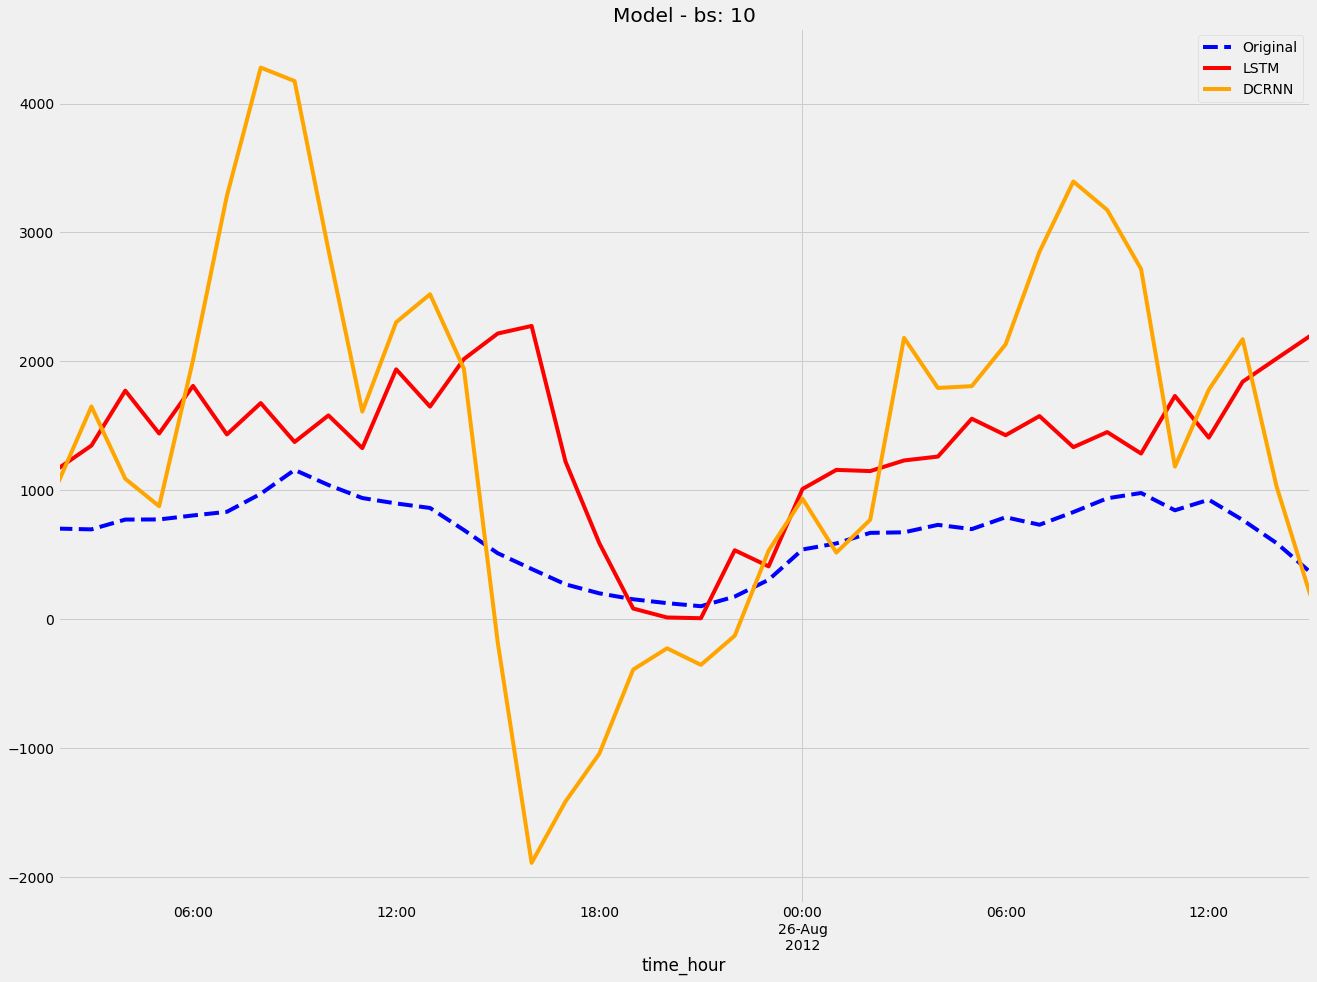

In [15]:
plot_compare_predictions(lstm_pred12, dcrnn_pred1, bs)

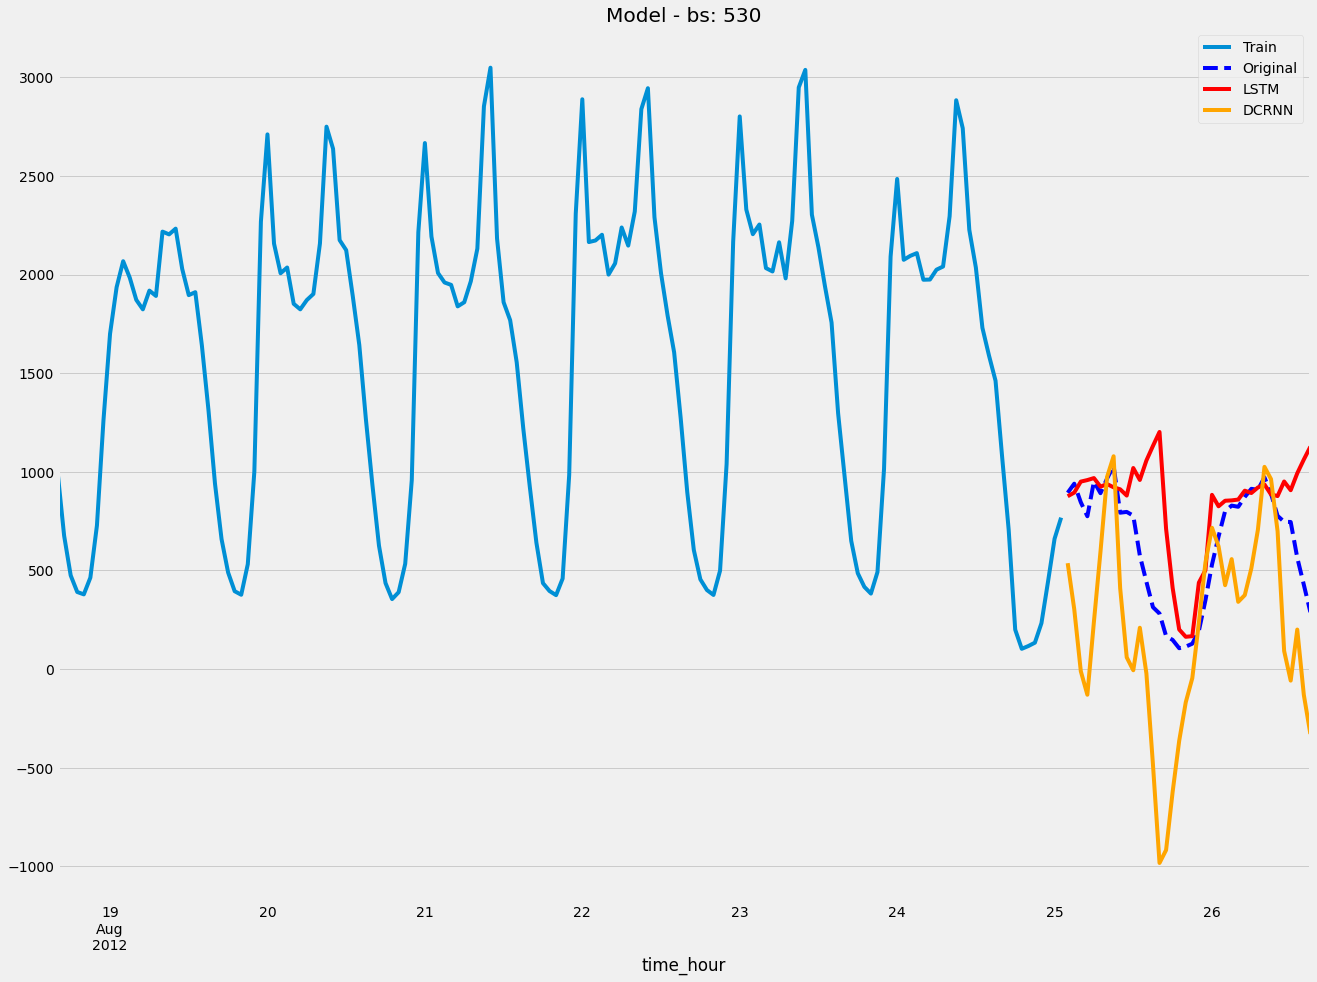

In [16]:
bs = '530'
plot_compare_models(lstm_pred12, dcrnn_pred1, bs)

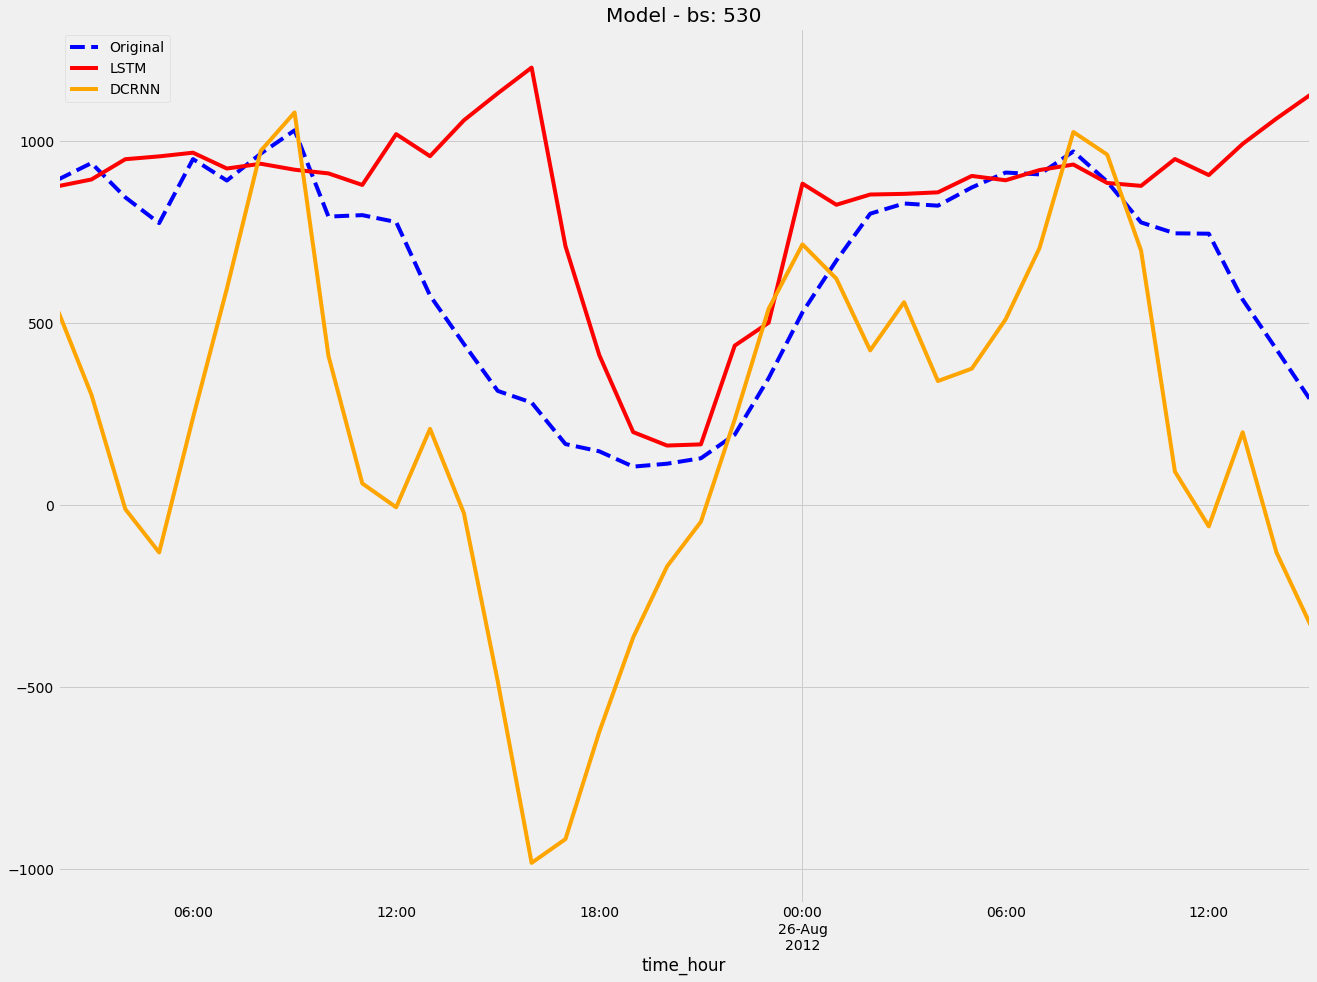

In [17]:
plot_compare_predictions(lstm_pred12, dcrnn_pred1, bs)

### Good BS

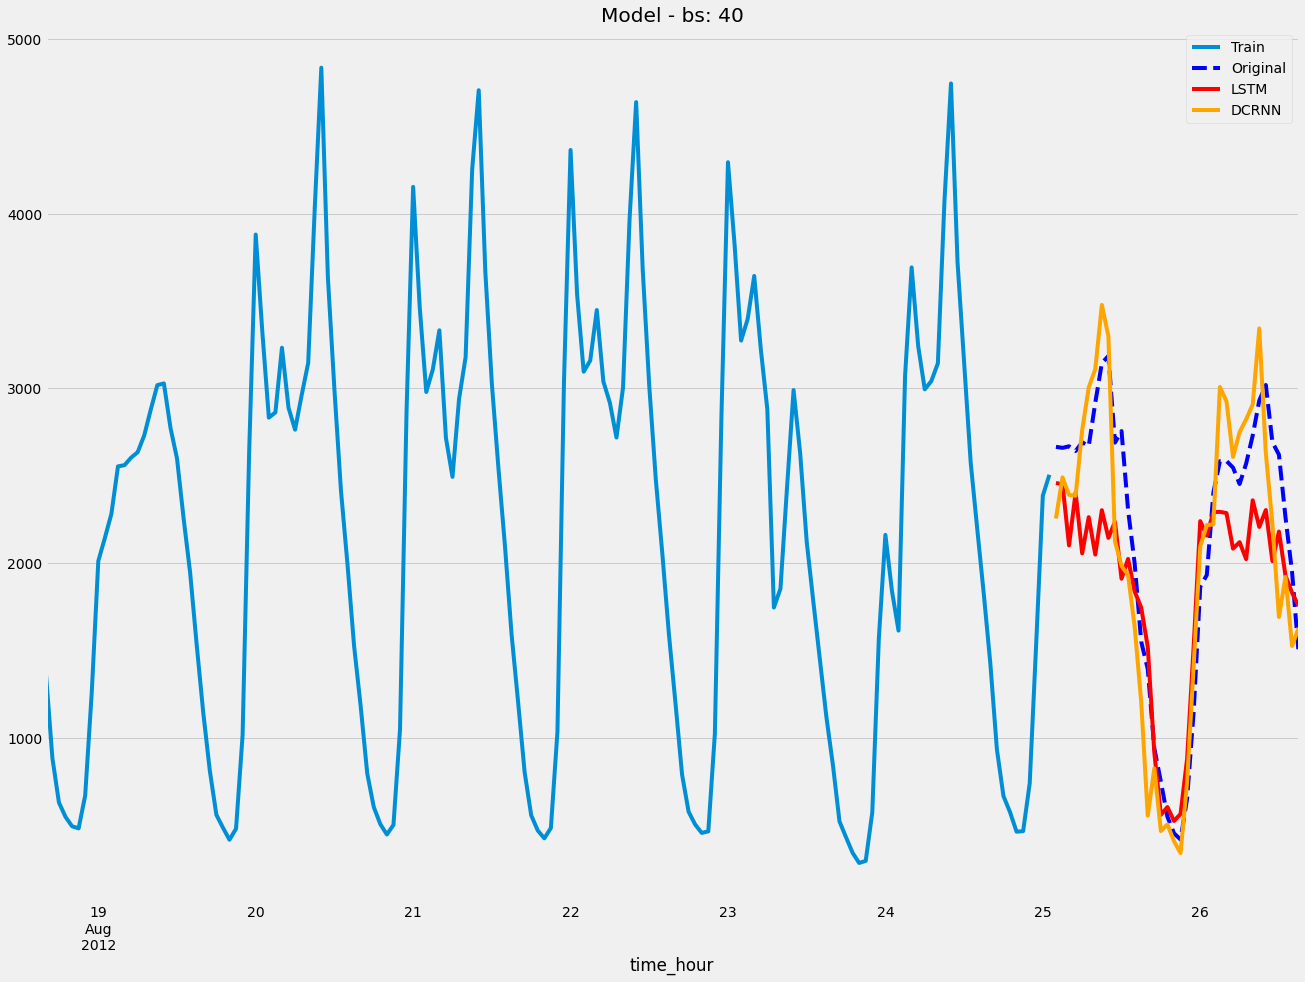

In [18]:
bs = "40"
plot_compare_models(lstm_pred12, dcrnn_pred1, bs)

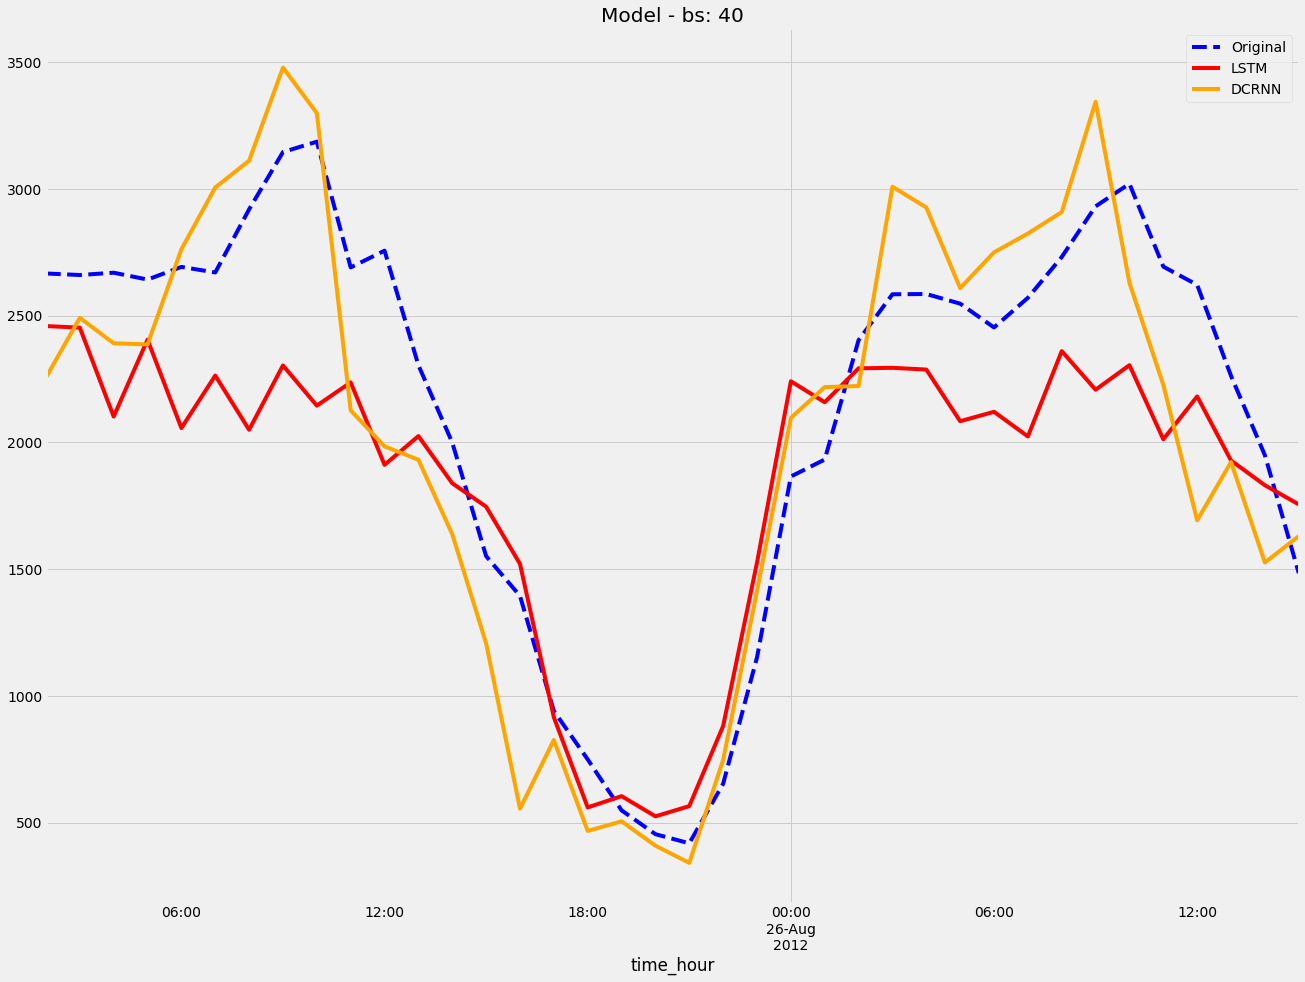

In [19]:
plot_compare_predictions(lstm_pred12, dcrnn_pred1, bs)

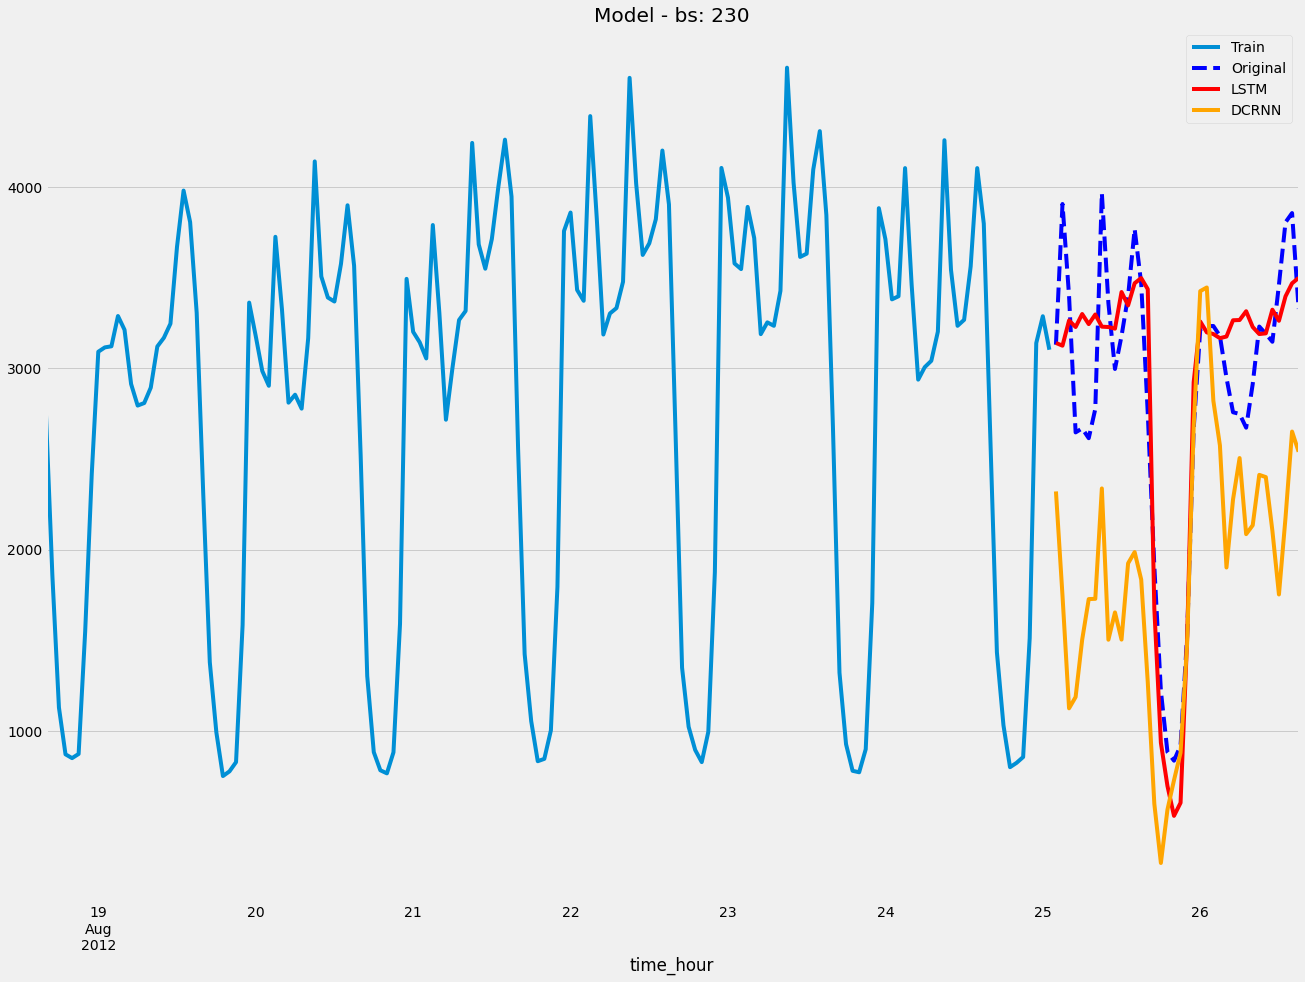

In [20]:
bs = "230"
plot_compare_models(lstm_pred12, dcrnn_pred1, bs)

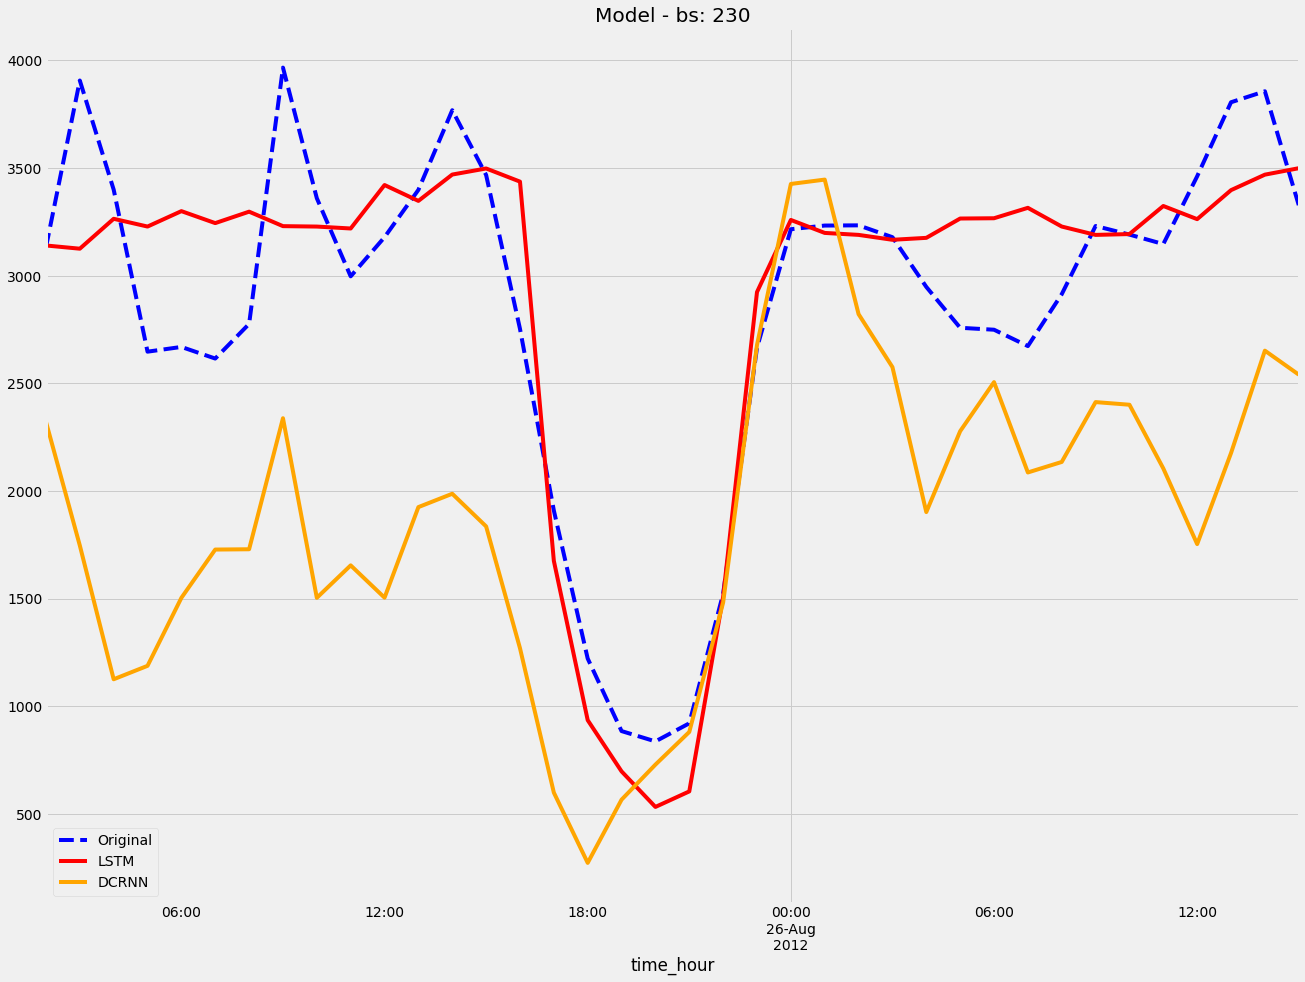

In [21]:
plot_compare_predictions(lstm_pred12, dcrnn_pred1, bs)